In [1]:
import os
import sys
import numpy
import json
import subprocess
import isambard_dev
import operator
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib notebook

# Backbone RMSD 

In [2]:
wd = '/projects/s21/ba13026/as69/output1'

In [3]:
def filter_XY(filename):
    lines = open(filename,'r').readlines()
    return [list(map(float,xy.split())) for xy in lines if (not "#" in xy) and (not "@" in xy)]

<IPython.core.display.Javascript object>


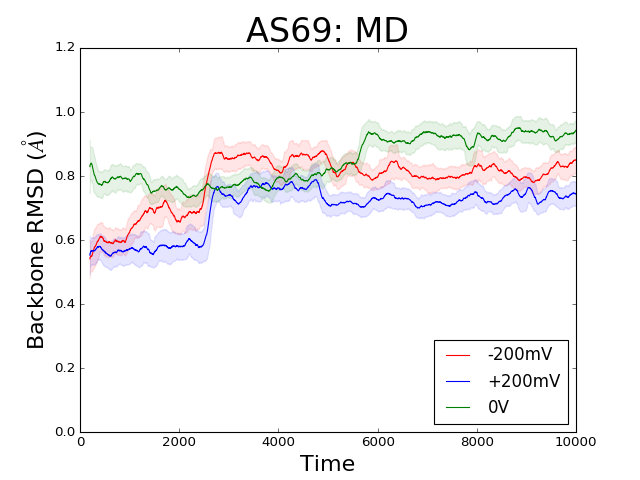

In [24]:
fig,ax = plt.subplots(1,1)

FILES = [
    'rmsd_md_-200mV_100ns.xvg',
    'rmsd_md_200mV_100ns.xvg',
    'bb_rmsd_100ns.xvg'
]

COLORS = [
    'red',
    'blue',
    'green'
]

LABELS = [
    '-200mV',
    '+200mV',
    '0V'
]

for i in range(len(FILES)):
    f = FILES[i]
    filename = wd+'/complex/mdf/'+f
    data = filter_XY(filename)[:-2]
    df = pd.DataFrame(10*numpy.array(data), columns=['time','rmsd'])
    
    winsize = 200
    m = df['rmsd'].rolling(winsize).agg(['mean', 'std'])
    ax = m['mean'].plot(color=COLORS[i],label=LABELS[i])
    ax.fill_between(
        m.index, 
        m['mean'] - m['std'], 
        m['mean'] + m['std'],
        color=COLORS[i],
        alpha=.1
    )

plt.title("AS69: MD", fontsize=30)
plt.ylabel('Backbone RMSD ($\AA$)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylim(0,1.2)

plt.legend(loc='lower right', fontsize=15)

<IPython.core.display.Javascript object>


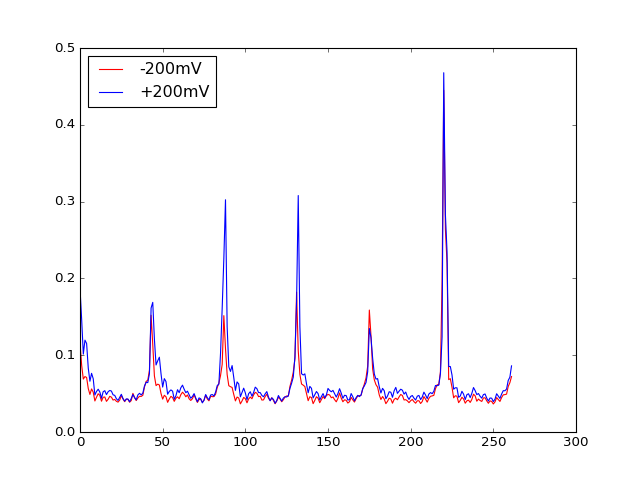

In [18]:
fig,ax = plt.subplots(1,1)

FILES = [
    'rmsf_md_200mV_30000ps_After_prmd_1200mV_30000ps_After_md_100ns.xvg',
    'rmsf_md_-200mV_30000ps_After_prmd_-1200mV_30000ps_After_md_100ns.xvg'
]

COLORS = [
    'red',
    'blue',
    'green'
]

LABELS = [
    '-200mV',
    '+200mV',
    '0V'
]

for i in range(len(FILES)):
    f = FILES[i]
    filename = wd+'/complex/mdf/'+f
    data = filter_XY(filename)[:-2]
    df = pd.DataFrame(numpy.array(data), columns=['residue','rmsf'])

    sns.lineplot(data=df['rmsf'],color=COLORS[i],label=LABELS[i],ax=ax)

plt.legend(loc='best')
plt.show()

TO-DO

* Radial profile of channel
* Find residue at minima of radial profiles (bottleneck)
* Water density functions
* Electrostatics of THR residues
* SC-SC interactions of channel
* Compute water flow
* Ionic flow

USEFUL TUTORIALS

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/